In [2]:
import fitsio
import lusee
import healpy as hp
import matplotlib
font = {'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
import scipy.linalg as la


In [9]:
# load default beam
B = lusee.Beam()
freq=B.freq

Text(0, 0.5, '$f_{ground}$')

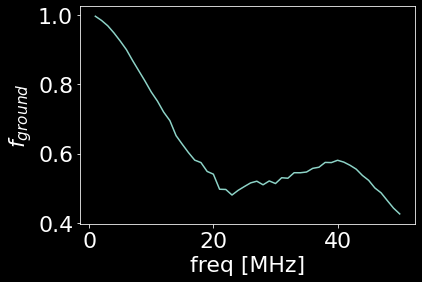

In [10]:
plt.plot(freq,B.ground_fraction())
plt.xlabel('freq [MHz]')
plt.ylabel('$f_{ground}$')

In [11]:
P=B.power()
w = np.sin(B.theta)

In [14]:
norm = (P*w[None,:,None]).sum(axis=(1,2))/B.ground_fraction()
Pnorm = P/norm[:,None,None]

In [15]:
C=np.zeros((50,50))
sw = 0
for i,phi in enumerate(B.phi):
    for j, theta in enumerate(B.theta):
        v = Pnorm[:,j,i]
        #plt.plot(v,alpha=0.1)
        cw = np.sin(theta)
        C+=np.outer(v,v)*cw
        sw +=cw
        
C/=sw
eva,eve = la.eig(C)   
    

Text(0, 0.5, 'response')

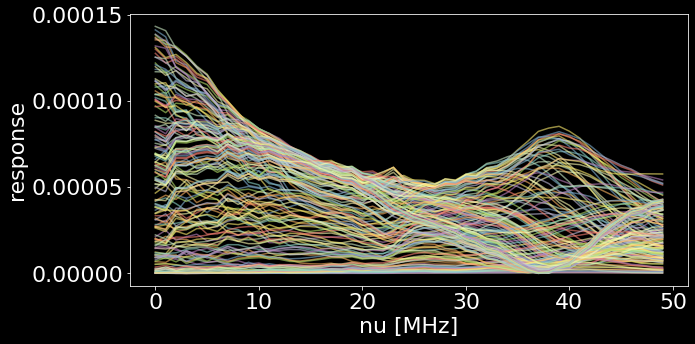

In [16]:
plt.figure(figsize=(10,5))
for i,phi in enumerate(B.phi):
    for j, theta in enumerate(B.theta):
        if (np.random.uniform(0,1)>0.995):
            v = Pnorm[:,j,i]
            plt.plot(v,alpha=0.6)
plt.xlabel("nu [MHz]")
plt.ylabel('response')

/usr/local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


[]

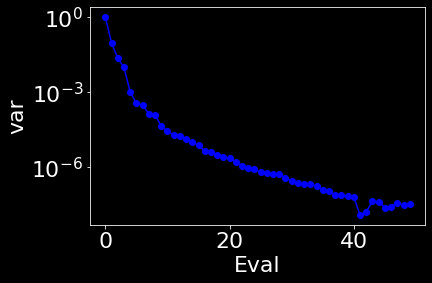

In [17]:
plt.plot(eva/eva[0],'bo-')
plt.xlabel("Eval")
plt.ylabel("var")
plt.semilogy()

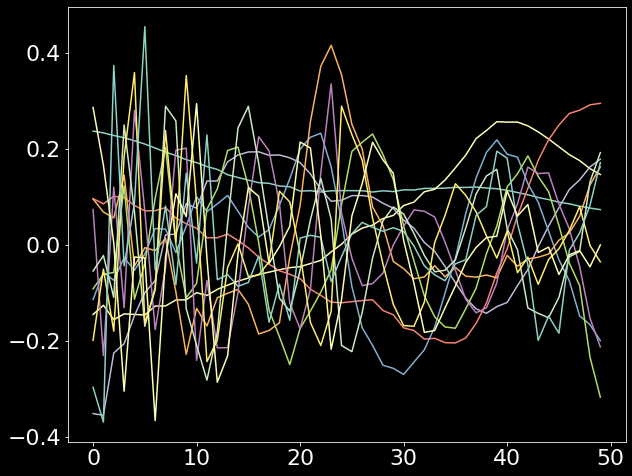

In [18]:
plt.figure(figsize=(10,8))
for i in range(12):
    plt.plot(eve[:,i], label=str(i))
#plt.legend()

In [19]:
eva

array([6.92659137e-08+0.j, 6.40952794e-09+0.j, 1.55724321e-09+0.j,
       6.80615348e-10+0.j, 6.79438149e-11+0.j, 2.45441582e-11+0.j,
       2.05969513e-11+0.j, 9.09787044e-12+0.j, 8.37075589e-12+0.j,
       2.97692388e-12+0.j, 1.85565560e-12+0.j, 1.32413073e-12+0.j,
       1.17282461e-12+0.j, 9.08068148e-13+0.j, 6.61259743e-13+0.j,
       5.11970800e-13+0.j, 2.90291647e-13+0.j, 2.71392553e-13+0.j,
       2.01623417e-13+0.j, 1.75167278e-13+0.j, 1.55490085e-13+0.j,
       1.09401561e-13+0.j, 7.69879414e-14+0.j, 6.28403156e-14+0.j,
       5.55139790e-14+0.j, 4.17356103e-14+0.j, 4.03082501e-14+0.j,
       3.55374982e-14+0.j, 3.45640186e-14+0.j, 2.54209766e-14+0.j,
       1.88680119e-14+0.j, 1.55734928e-14+0.j, 1.43304021e-14+0.j,
       1.36611316e-14+0.j, 1.14643449e-14+0.j, 8.45526443e-15+0.j,
       7.37491722e-15+0.j, 5.21031521e-15+0.j, 4.96598562e-15+0.j,
       4.57965702e-15+0.j, 4.22188425e-15+0.j, 8.10093647e-16+0.j,
       1.07625156e-15+0.j, 2.84429890e-15+0.j, 2.73374731e-15+

(1e-05, 0.01)

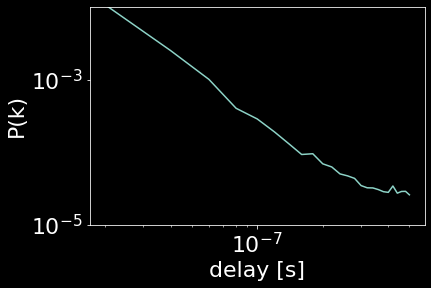

In [20]:
Pk = np.zeros(26)
for i,phi in enumerate(B.phi):
    for j, theta in enumerate(B.theta):
        v = Pnorm[:,j,i]
        Pk += np.abs(np.fft.rfft(v)**2)
k = 1/50e6*np.arange(26)
plt.plot(k,Pk)  
plt.semilogx()
plt.xlabel("delay [s]")
plt.ylabel("P(k)")
plt.loglog()
plt.ylim(1e-5,1e-2)